#         End to End Exploratory Data Analysis (EDA), Feature Engineering and Model Training and Prediction

##                             Project: Default of Credit Card Clients
###                                   Author: Ayan Chowdhury
                                         
##### Abstract:This research aimed at the case of customersâ€™ default payments and compares the predictive accuracy of probability of default among six data mining methods.

Steps involved: 

* ML Algorithm: Logistic Regression 
* Estimators: Grid SearchCV
* Class Type: Imbalance Binary

Details of dataset: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients


In [1]:
#import necesary library and tools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#data=pd.read_csv('C:\\Users\\Lenovo\Downloads\\ML project\\credit_card\\artifact\\train.csv')

In [3]:
#data.iloc[:,6:24].columns

In [4]:
#Data ingestion from github/local dir
data=pd.read_excel('default of credit card clients.xls',index_col=False)
data.head(2)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1


In [5]:
data.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [6]:
data.columns = data.iloc[0]
data=data.drop(data.index[0])

In [7]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Data Description
The first group of variables contains information about the client personal information: 
1. ID: ID of each client, categorical variable 
2. LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit) 
3. SEX: Gender, categorical variable (1=male, 2=female) 
4. EDUCATION: level of education, categorical variable (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown) 
5. MARRIAGE: Marital status, categorical variable (1=married, 2=single, 3=others) 
6. AGE: Age in years, numerical variable 

The following attributes contains information about the delay of the past payment referred to a specific month: 
1. PAY_0: Repayment status in September 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above) 
2. PAY_2: Repayment status in August 2005 (same scale as before) 
3. PAY_3: Repayment status in July 2005 (same scale as before) 
4. PAY_4: Repayment status in June 2005 (same scale as before) 
5. PAY_5: Repayment status in May 2005 (same scale as before) 
6. PAY_6: Repayment status in April 2005 (same scale as before)

Other variables instead consider the information related to the amount of bill statement (i.e. a monthly report that credit card companies issue to credit card holders in a specific month): 
1. BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar) 
2. BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar) 
3. BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar) 
4. BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar) 
5. BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar) 
6. BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar) 

The following variables instead consider the amount of previous payment in a specific month: 
1. PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar) 
2. PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar) 
3. PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar) 
4. PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar) 
5. PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar) 
6. PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar) 

The last variable is the one to be predicted:

default.payment.next.month: indicate whether the credit card holders are defaulters or non-defaulters 
1=yes, 
0=no

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

Initial Observations:
1. The data set was in excel format with no proper header
2. The feature variable are not in proper format 
3. The dataset has been divided into few parts: 
   -- client personal data: age,marrital status, gender
   -- repayment type (overdue or paid on time), bill amount, paid amount
   -- credit limit provided by bank
   -- target column(defaultpayment next month)
4. Total of 25 columns are there

Initial Tasks:
1. Make the file into a proper dataset by adding/removing header
2. Check for null/ missing values
3. Check the datatype of features
4. Segregate categorical and numerical datas
5. Convert the valus which are not in numeric datatype
6. Check for correlation among numerical features
7. Check for class imbalance 
8. Convert or re-arrange the data into format mentioned in repository
9. Plot different charts for proper visualization of features and identify the distribution

In [9]:
#check for null values
data.isna().sum()

0
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [10]:
data['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

In [11]:
#see the column names
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [12]:
df=data.copy()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

In [21]:
#converting into numeric columns
data_col=data.columns
data[data_col] = data[data_col].apply(pd.to_numeric, errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [23]:
#change the name of 'default payment next month'into 'default_payment_next_month' 
data['default_payment_next_month']=data['default payment next month']
data['default_payment_next_month']=data['default_payment_next_month'].apply(pd.to_numeric, errors='coerce')

In [24]:
data=data.drop(columns=['default payment next month'])

In [25]:
#see the valuecounts of categorical featues 
print(data['SEX'].value_counts())
print('='*12)
print(data['EDUCATION'].value_counts())
print('='*12)
print(data['MARRIAGE'].value_counts())
print('='*12)
print(data['default_payment_next_month'].value_counts())
print('='*12)

2    18112
1    11888
Name: SEX, dtype: int64
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
0    23364
1     6636
Name: default_payment_next_month, dtype: int64


In [190]:
#CLASS IMBALNCE PROBLEM FOUND

In [73]:
df_num=data.iloc[:,6:24]
print(df_num.columns)
df_cat=data.iloc[:,2:5]
print(df_cat.columns)
df_quant=data[['LIMIT_BAL','AGE']]
print(df_quant.columns)

Index(['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object', name=0)
Index(['SEX', 'EDUCATION', 'MARRIAGE'], dtype='object', name=0)
Index(['LIMIT_BAL', 'AGE'], dtype='object', name=0)


Text(0.5, 1.0, 'CORRELATION MATRIX - HEATMAP')

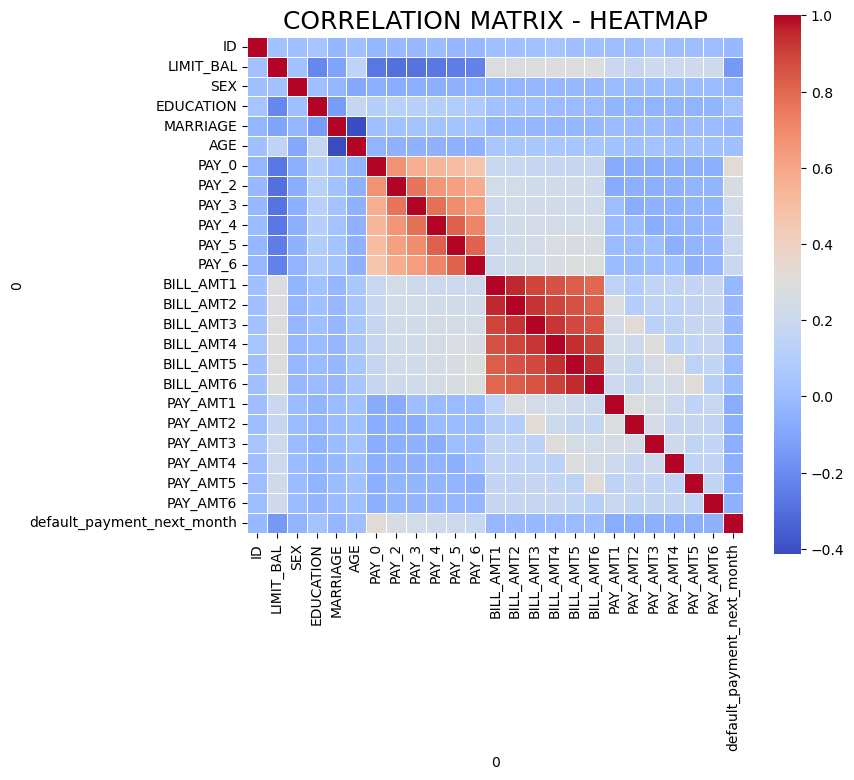

In [76]:
#  looking at correlations matrix, defined via Pearson function  
corr = data.corr() # .corr is used to find corelation
f,ax = plt.subplots(figsize=(8, 7))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f', cmap="coolwarm", linewidths=.5)
plt.title('CORRELATION MATRIX - HEATMAP', size=18)

In [77]:
data['default_payment_next_month'].isna().sum()

0

<AxesSubplot:xlabel='default_payment_next_month', ylabel='count'>

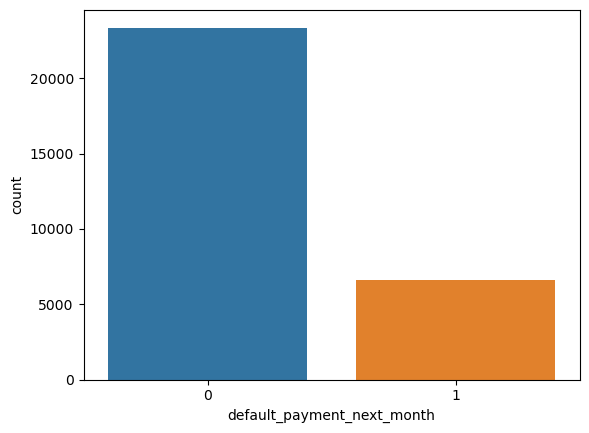

In [78]:
#check for class imbalance
sns.countplot(data=data,x='default_payment_next_month')

Class is highly imbalanced as less than 50% data belong to default type data (1). Majority of class belong to --> '0'

In [79]:
data['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

As per data repository we found:
Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
Hence, we will consider 4,5,6,0 ------> 4

In [80]:
others=[0,4,5,6]
data['EDUCATION']=data['EDUCATION'].replace(to_replace=others,value=4)
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [81]:
data['MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=int64)

As per data repository we found: Marital status (1 = married; 2 = single; 3 = others). Hence, we will consider 0,3------> 3

In [82]:
others1=[0,3]
data['MARRIAGE']=data['MARRIAGE'].replace(to_replace=others1,value=3)
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [83]:
data['MARRIAGE'].dtypes

dtype('int64')

In [84]:
data['SEX']=data['SEX'].apply(pd.to_numeric, errors='coerce')

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

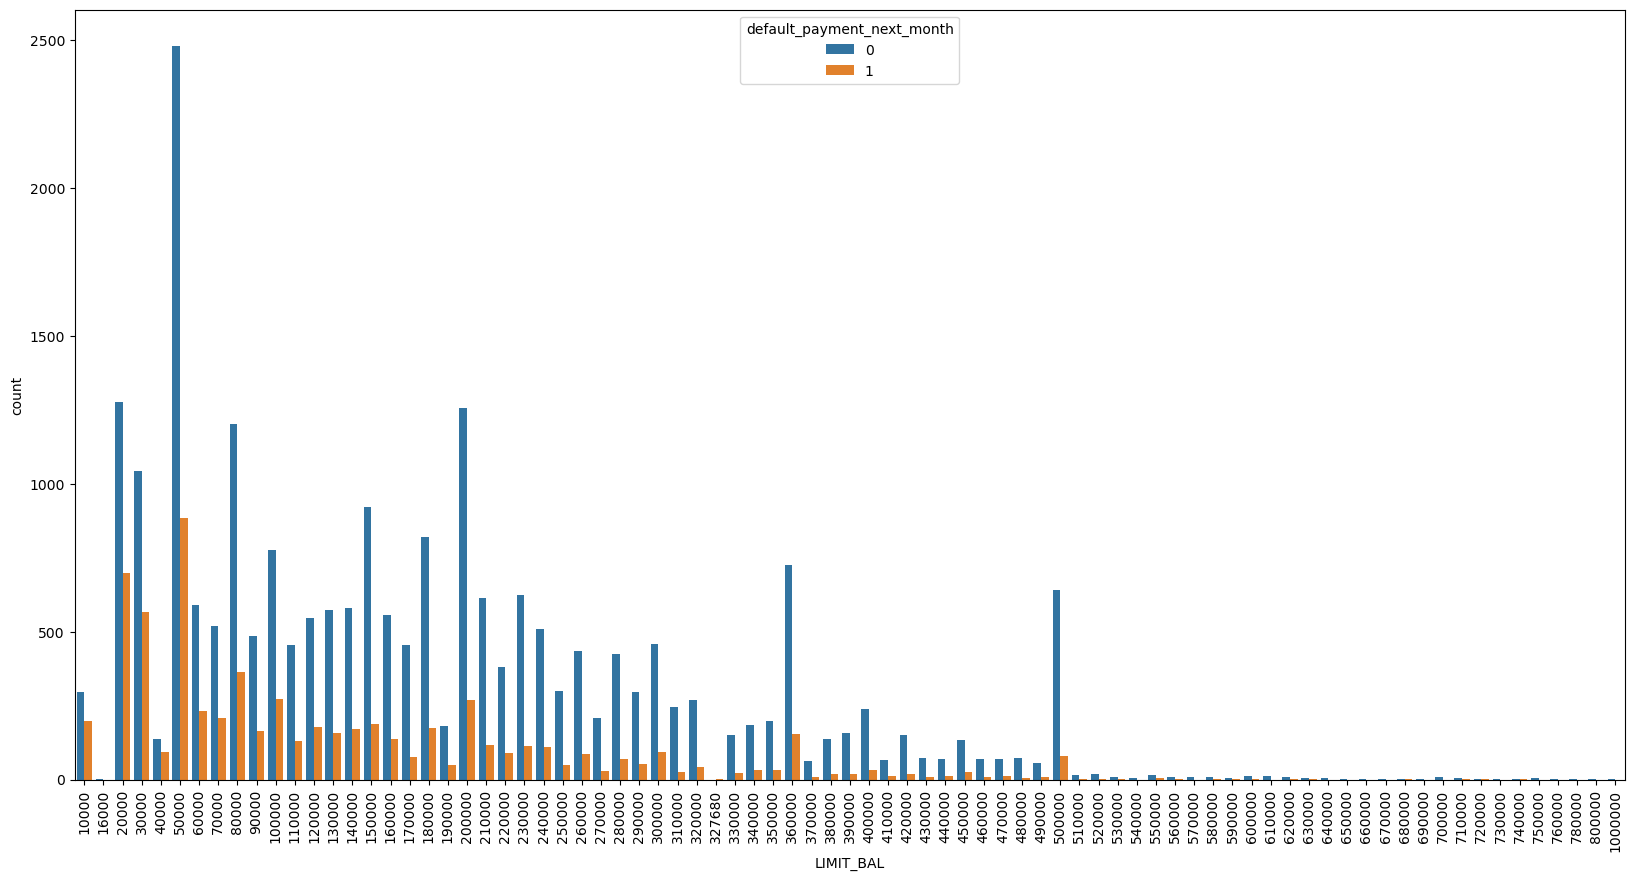

In [86]:
#check various distributions
fig, axs = plt.subplots(1, 1, figsize=(20,10))
plt.subplot(111)
sns.countplot(data=data,x='LIMIT_BAL',hue='default_payment_next_month')
plt.xticks(rotation=90)
plt.show()

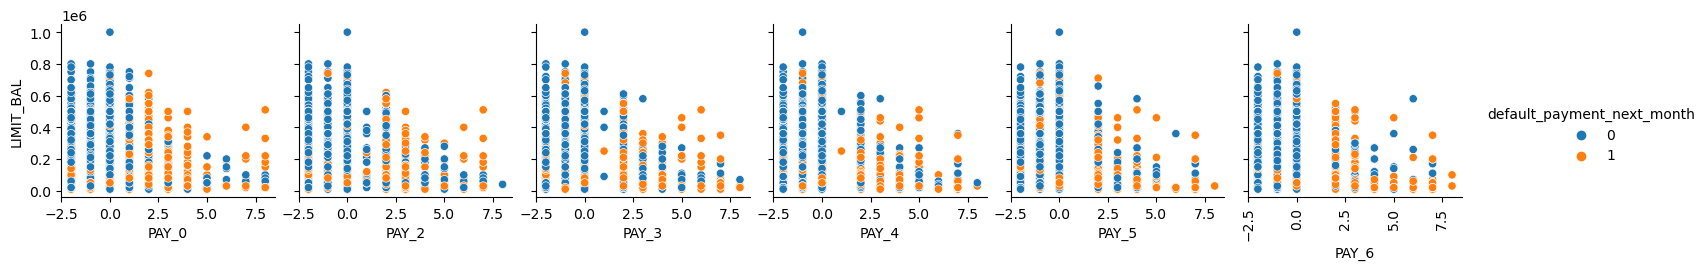

In [87]:
fig = plt.figsize=(40,20)
sns.pairplot(data=data,x_vars=['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'],y_vars='LIMIT_BAL',hue='default_payment_next_month', kind='scatter')
plt.xticks(rotation=90)
plt.show()

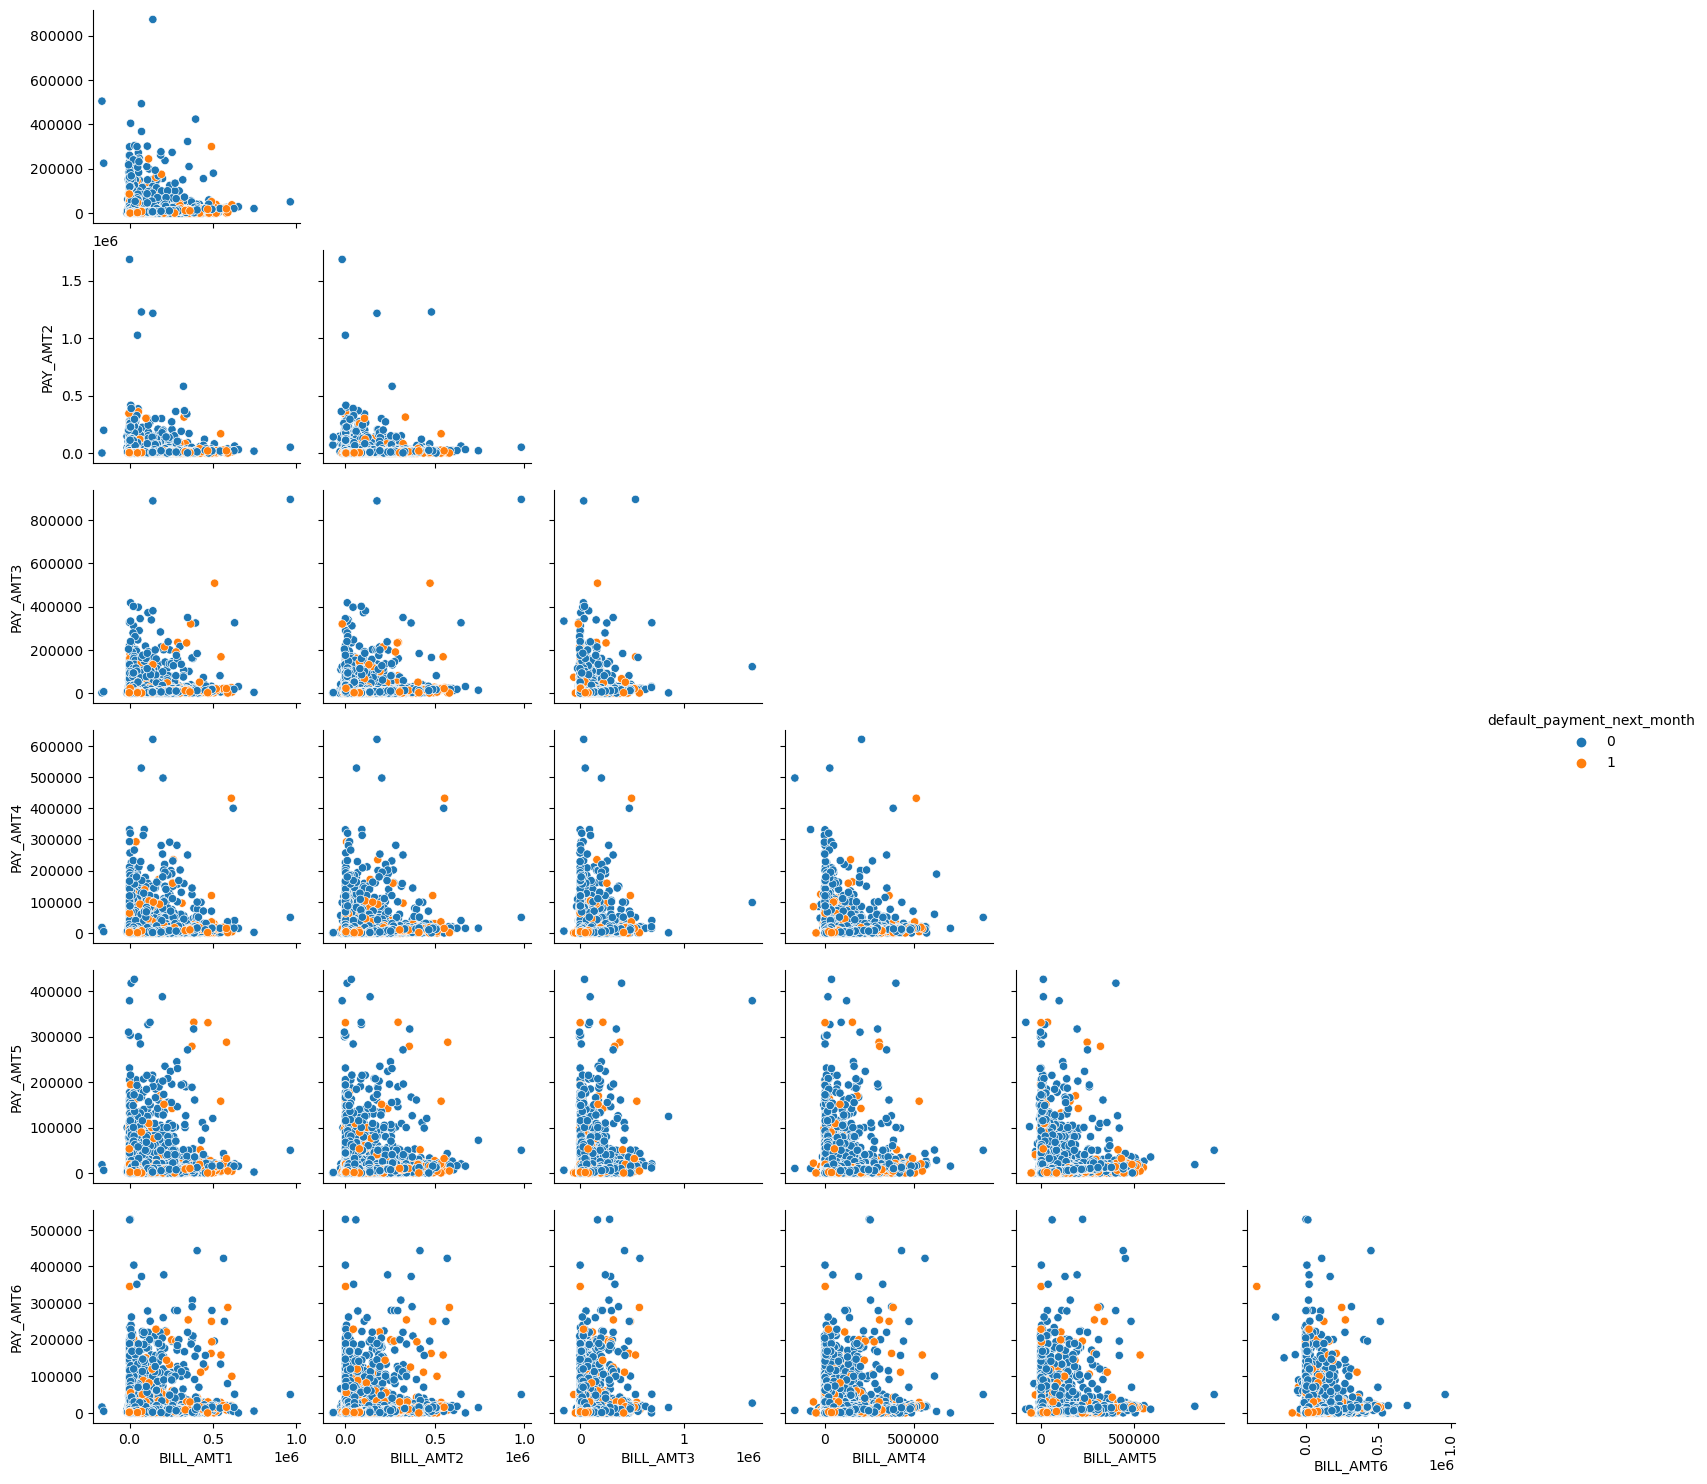

In [88]:
fig = plt.figsize=(20,10)
sns.pairplot(data=data,x_vars=['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'],y_vars=['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],hue='default_payment_next_month', kind='scatter',corner=True)
plt.xticks(rotation=90)
plt.show()

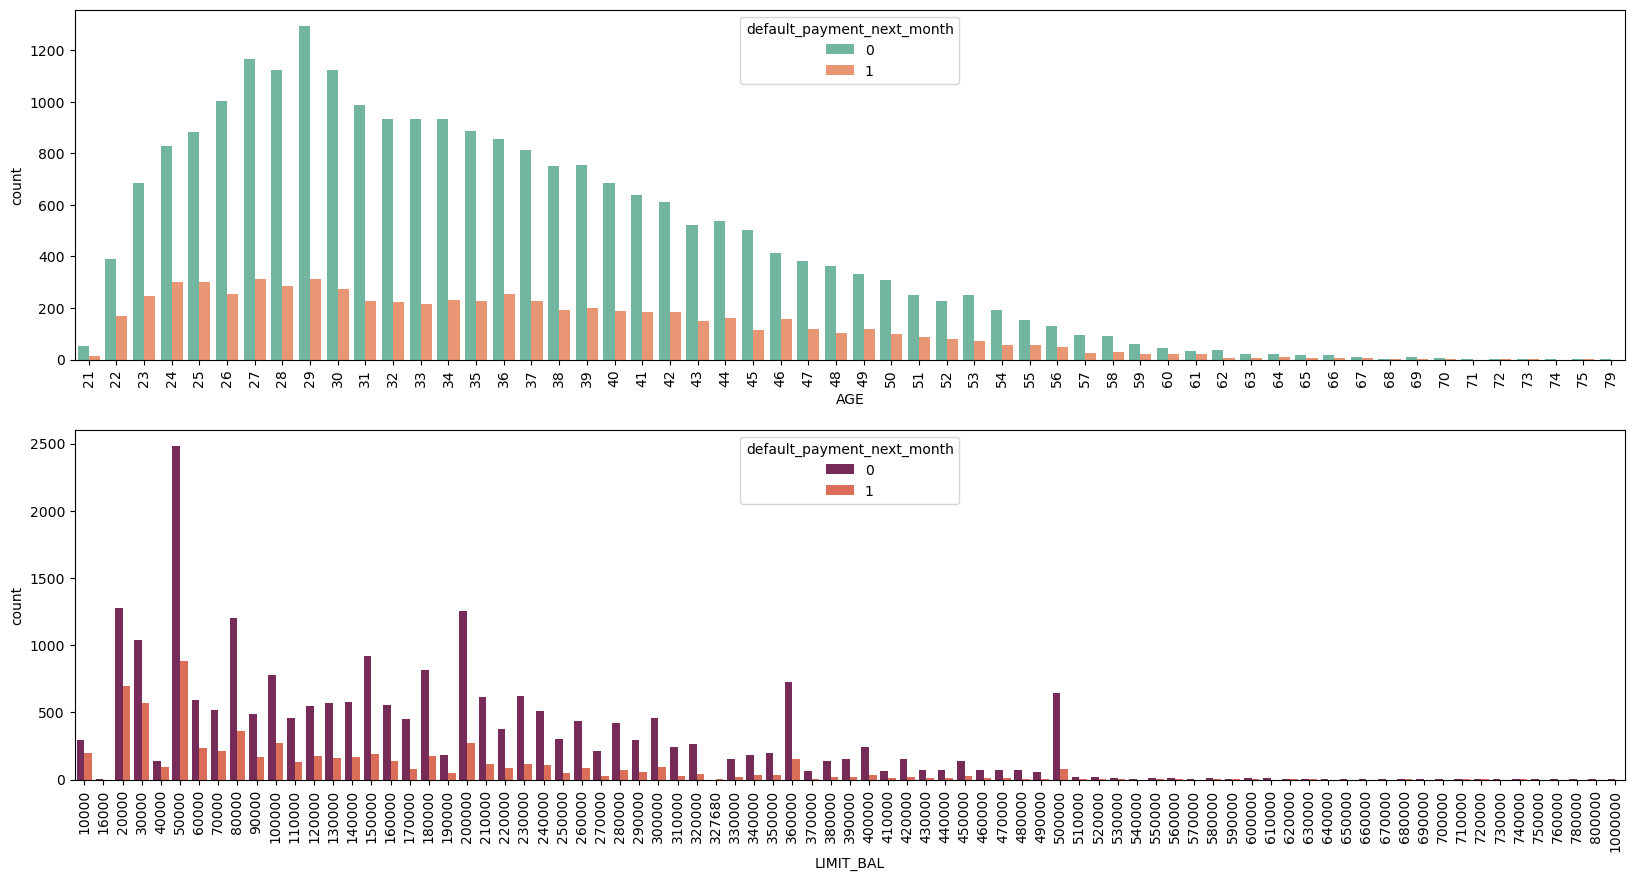

In [89]:
fig, axs = plt.subplots(1, 1, figsize=(20,10))
plt.subplot(211)
sns.countplot(data=data,x='AGE',hue='default_payment_next_month',palette='Set2')
plt.xticks(rotation=90)
plt.subplot(212)
sns.countplot(data=data,x='LIMIT_BAL',hue='default_payment_next_month',palette='rocket')
plt.xticks(rotation=90)
plt.show()

#### EDA Observations:
1. The default payment is maximum for credit limit below 370000 
2. The default payment is generally seen after 2.5 years for any maaximum of cases 
3. Maximum default payment along with bill payment is found in the region within 500000
4. Age group of above 24 yrs and below 40 yrs have maximum default with average count of 300
5. Highest default happend for credit limit of 50k

In [91]:
female=2
data['SEX']=data['SEX'].replace(to_replace=female,value=0)

In [92]:
data['SEX']

1        0
2        0
3        0
4        0
5        1
        ..
29996    1
29997    1
29998    1
29999    1
30000    1
Name: SEX, Length: 30000, dtype: int64

From repository it is found that female-->2, male---->1 . converting female as 0 for binary type values and better model training.

### FEATURE RNGINEERING AND MODEL TRAINING

In [93]:
#importing necessary libraries for future
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve,precision_recall_curve,auc,f1_score
import matplotlib.pyplot as plt

In [99]:
df_copy=data.copy()

In [100]:
#dropping ID column as "ID" is of no use
df_copy=df_copy.drop(columns=['ID'])

In [101]:
df_copy.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
1,20000,0,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,0,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,0,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,0,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [102]:
df_num=[feature for feature in df_copy.columns if df_copy[feature].dtype!='O']
df_num

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default_payment_next_month']

In [103]:
X=df_copy.iloc[:,:-1]
y=df_copy.iloc[:,-1]
print(X.shape)
print(y.shape)

(30000, 23)
(30000,)


In [104]:
#implementing the train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [105]:
#import standard scaler for scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [106]:
#scaling the data
X_train_trans=sc.fit_transform(X_train)
X_test_trans=sc.transform(X_test)

## 1. TRAINING MODEL: LOGISTIC REGRESSION
## 2. HYPER PARAMETER TUNNING USING GRID SEARCHCV
## 3. AUC/ROC CURVE AND SCORES

### Penalty and Solver

solver: {‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}, default=’lbfgs’
Algorithm to use in the optimization problem. Default is ‘lbfgs’. To choose a solver, you might want to consider the following aspects:

For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;

For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;

‘liblinear’ is limited to one-versus-rest schemes.

‘newton-cholesky’ is a good choice for n_samples >> n_features, especially with one-hot encoded categorical features with rare categories. Note that it is limited to binary classification and the one-versus-rest reduction for multiclass classification. Be aware that the memory usage of this solver has a quadratic dependency on n_features because it explicitly computes the Hessian matrix.

Warning The choice of the algorithm depends on the penalty chosen. 

Supported penalties by solver:
1. ‘lbfgs’ - [‘l2’, None]

2. ‘liblinear’ - [‘l1’, ‘l2’]

3. ‘newton-cg’ - [‘l2’, None]

4. ‘newton-cholesky’ - [‘l2’, None]

5. ‘sag’ - [‘l2’, None]

6. ‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, None]

penalty{‘l1’, ‘l2’, ‘elasticnet’, None}, default=’l2’
Specify the norm of the penalty:

None: no penalty is added;

'l2': add a L2 penalty term and it is the default choice;

'l1': add a L1 penalty term;

'elasticnet': both L1 and L2 penalty terms are added.

In [107]:
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'newton-cholesky', 'liblinear'] #considering these solvers as base solvers
penalty = ['l2'] #sparsity of l2 regularisation is least.
c_values = [100, 10, 1.0, 0.1,0.01]

In [109]:
lr=model.fit(X_train_trans,y_train)
y_pred=lr.predict(X_test_trans)

In [60]:
#fit for logistic-regression
lr=model.fit(X_train,y_train)
y_pred=lr.predict(X_test)


In [110]:
y_test.dtype

dtype('int64')

In [111]:
#model classification report
report=classification_report(y_test,y_pred)
report_matrix=confusion_matrix(y_test,y_pred)
print(report_matrix)
print(report)

[[4549  138]
 [1003  310]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.69      0.24      0.35      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000



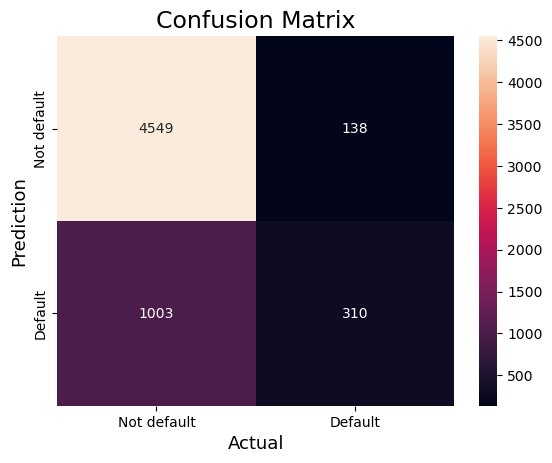

In [112]:
sns.heatmap(report_matrix,
            annot=True,
            fmt='g',
            xticklabels=['Not default','Default'],
            yticklabels=['Not default','Default'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

#### If we  see that the roc-auc score is around 72% where as there is pretty poor distribution of class in classification problem. Hence it suggests that the model may be biased towards the majority class and needs to be adjusted to improve performance for the minority classes.
#### We must consider the approach in increasing the recall, precision value or take steps in increase FP and TP or decrease TN. Hence we will consider f-beta as scoring parameter in hypertunning.

In [134]:
# define grid search
# we will consider recall here in scoring
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [117]:
# print best estimator and params
print(grid_result.best_estimator_)
print(grid_result.best_params_)

LogisticRegression(C=10, solver='newton-cg')
{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


In [118]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.365095 (0.022912) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cholesky'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.366052 (0.024265) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cholesky'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.365342 (0.022151) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cholesky'}
0.000000 (0.000000) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.365315 (0.025210) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cholesky'}
0.000000 (0.000000) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.357125 (0.021515) with: {'C': 0.01, 'penalty': 'l2', 

In [123]:
#predicting the X_test on best estimator
y_pred_hyp=grid_result.best_estimator_.predict(X_test_trans)

In [124]:
y_pred_hyp

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [125]:
#printing the model report
report_hyp=classification_report(y_test,y_pred_hyp)
report_matrix_hyp=confusion_matrix(y_test,y_pred_hyp)
print(report_matrix_hyp)
print(report_hyp)
#print(f1_score(y_test,y_pred_hyp))

[[3191 1496]
 [ 526  787]]
              precision    recall  f1-score   support

           0       0.86      0.68      0.76      4687
           1       0.34      0.60      0.44      1313

    accuracy                           0.66      6000
   macro avg       0.60      0.64      0.60      6000
weighted avg       0.75      0.66      0.69      6000



In [ ]:
INCREASED VALUE IN F1 SCORE. SUPPORTS CLASS IMBALANCE, CHANGE IN TN/FN

In [128]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.
     ------------------------------------ 101.0/101.0 MB 885.3 kB/s eta 0:00:00


In [184]:
#importing Ml algorithms for further study and metrics for their analysis
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve,precision_recall_curve,auc

lets perform the analysis on other Ml algorithms:

1. Random Forest
2. XgBoost
3. Catboost

In [167]:
def evaluate_models(X_train,y_train,X_test,y_test,models,param):
    report={}
    for i in range(len(list(models))):
        model=list(models.values())[i]
        para=param[list(models.keys())[i]]
        
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        gs=GridSearchCV(model,para,cv=cv,scoring='f1',n_jobs=-1,error_score=0)
        #scoring generally involves accuracy but for this problem we will consider the f1-score.
        #We need to increase or modify the minority class here.
        gs.fit(X_train,y_train)

        model.set_params(**gs.best_params_)
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        
        f1_score_train=f1_score(y_test,y_pred)
        accuracy=accuracy_score(y_test,y_pred)
        report=classification_report(y_test,y_pred)
        print(list(models.keys())[i])
        print('\n')
        print(f'f1-score:{f1_score_train}')
        print(f'accuracy:{accuracy}')
        print(report)
        
        #report[list(models.keys())[i]]=f1_score_train

    return report

In [168]:
models={'logisticRegression': LogisticRegression(),
        'RandomForest': RandomForestClassifier(),
        'xgboost': XGBClassifier(),
        'catboost': CatBoostClassifier()
            }
params={'logisticRegression':{'C': [10], 'penalty': ['l2'], 'solver': ['newton-cg']},
        'RandomForest':{'n_estimators': [8,16,32,64],'max_features':['sqrt','log2']},
        'xgboost':{'n_estimators': [16,48,72,96], 'learning_rate':[0.01,0.01],'max_depth':[3]},
        'catboost':{'n_estimators': [16,48,72,96], 'learning_rate':[0.01,0.01],'max_depth':[3]}}

model_report=evaluate_models(X_train=X_train_trans,y_train=y_train,
                                 X_test=X_test_trans,y_test=y_test,models=models,param=params)

#best_model_score = max(sorted(model_report.values()))

#best_model_name=list(model_report.keys())[list(model_report.values()).index(best_model_score)]
#best_model=models[best_model_name]

logisticRegression


f1-score:0.35207268597387853
accuracy:0.8098333333333333
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.69      0.24      0.35      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000

RandomForest


f1-score:0.45271925526702594
accuracy:0.8138333333333333
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.63      0.35      0.45      1313

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000

xgboost


f1-score:0.45797684952189227
accuracy:0.8205
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.68      0.3

42:	learn: 0.5393443	total: 891ms	remaining: 1.1s
43:	learn: 0.5372239	total: 918ms	remaining: 1.08s
44:	learn: 0.5351379	total: 940ms	remaining: 1.06s
45:	learn: 0.5331341	total: 962ms	remaining: 1.04s
46:	learn: 0.5311334	total: 981ms	remaining: 1.02s
47:	learn: 0.5292076	total: 1s	remaining: 1s
48:	learn: 0.5272447	total: 1.02s	remaining: 978ms
49:	learn: 0.5254164	total: 1.04s	remaining: 955ms
50:	learn: 0.5235737	total: 1.06s	remaining: 937ms
51:	learn: 0.5217878	total: 1.08s	remaining: 915ms
52:	learn: 0.5200206	total: 1.1s	remaining: 895ms
53:	learn: 0.5183247	total: 1.14s	remaining: 884ms
54:	learn: 0.5166548	total: 1.16s	remaining: 865ms
55:	learn: 0.5150340	total: 1.19s	remaining: 847ms
56:	learn: 0.5134474	total: 1.21s	remaining: 826ms
57:	learn: 0.5118975	total: 1.23s	remaining: 804ms
58:	learn: 0.5104082	total: 1.24s	remaining: 781ms
59:	learn: 0.5089145	total: 1.26s	remaining: 757ms
60:	learn: 0.5074058	total: 1.28s	remaining: 734ms
61:	learn: 0.5059635	total: 1.3s	remain

**best_model= XGBoost**

**Accuracy= 0.8205**

**F1-score=0.45797684952189227**

In [ ]:
#we see that all accuracies are nearby but we see a drift in f1 scores from logistic reg to xgboost

=======================================================================================================================

##  roc_curve and roc_auc_scores

#### ROC: Receiver Operator Characteristic 
###### ROC_CURVE: Basically, ROC curve is a graph that shows the performance of a classification model at all possible thresholds( threshold is a particular value beyond which you say a point belongs to a particular class). The curve is plotted between two parameters TRUE POSITIVE RATE(TPR) and FALSE POSITIVE RATE(FPR) 

#### AUC: Area Under Curve
##### ROC_AUC_SCORES: AUC measures how well a model is able to distinguish between classes. ROC_AUC_SCORES defines the amount of tries to measure if the rank ordering of classifications is correct it does not take into account actually predicted probabilities

#### Precision_Recall_Curve
###### Precision is the proportion of correct positive classifications (true positive) divided by the total number of predicted positive classifications that were made (true positive + false positive). Recall is the proportion correct positive classifications (true positive) divided by the total number of the truly positive classifications (true positive + false negative).

######    A PR curve is simply a graph with Precision values on the y-axis and Recall values on the x-axis. In other words, the PR curve contains TP/(TP+FP) on the y-axis and TP/(TP+FN) on the x-axis.

In [172]:
lr=LogisticRegression()
rf=RandomForestClassifier()
xgb=XGBClassifier()
cbt=CatBoostClassifier()

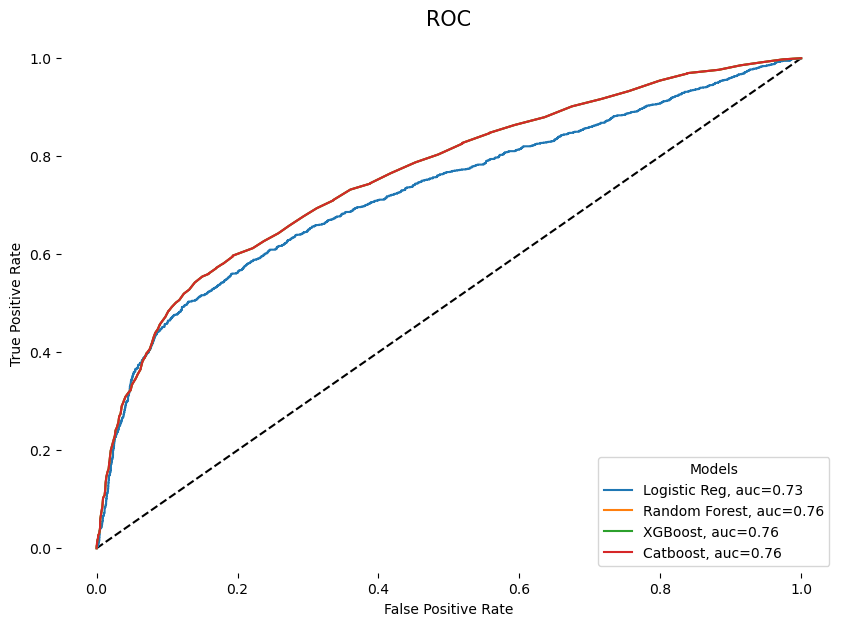

In [183]:
y_pred_proba_lr = lr.predict_proba(X_test_trans)[::,1]
fpr1, tpr1, _ = roc_curve(y_test,  y_pred_proba_lr)
auc1 = roc_auc_score(y_test, y_pred_proba_lr)

y_pred_proba_RF = rf.predict_proba(X_test_trans)[::,1]
fpr2, tpr2, _ = roc_curve(y_test,  y_pred_proba_RF)
auc2 = roc_auc_score(y_test, y_pred_proba_RF)

y_pred_proba_XGB = rf.predict_proba(X_test_trans)[::,1]
fpr3, tpr3, _ = roc_curve(y_test,  y_pred_proba_XGB)
auc3 = roc_auc_score(y_test, y_pred_proba_XGB)

y_pred_proba_CBT = rf.predict_proba(X_test_trans)[::,1]
fpr4, tpr4, _ = roc_curve(y_test,  y_pred_proba_CBT)
auc4 = roc_auc_score(y_test, y_pred_proba_CBT)

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1,tpr1,label="Logistic Reg, auc="+str(round(auc1,2)))
plt.plot(fpr2,tpr2,label="Random Forest, auc="+str(round(auc2,2)))
plt.plot(fpr3,tpr3,label="XGBoost, auc="+str(round(auc3,2)))
plt.plot(fpr4,tpr4,label="Catboost, auc="+str(round(auc4,2)))
plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True)

### FPR = TP/(TN+FP)
### TPR / Recall = TP/(TP+FN)
###  Precision = TP/(TP+FP)

##### ROC-AUC does not work well under severe imbalance in the dataset because Denominator of FPR has a True Negatives as one factor since Negative Class is in majority the denominator of FPR is dominated by True Negatives which makes FPR less sensitive to any changes in minority class predictions. To overcome this, Precision-Recall Curves are used instead of ROC and then the AUC is calculated

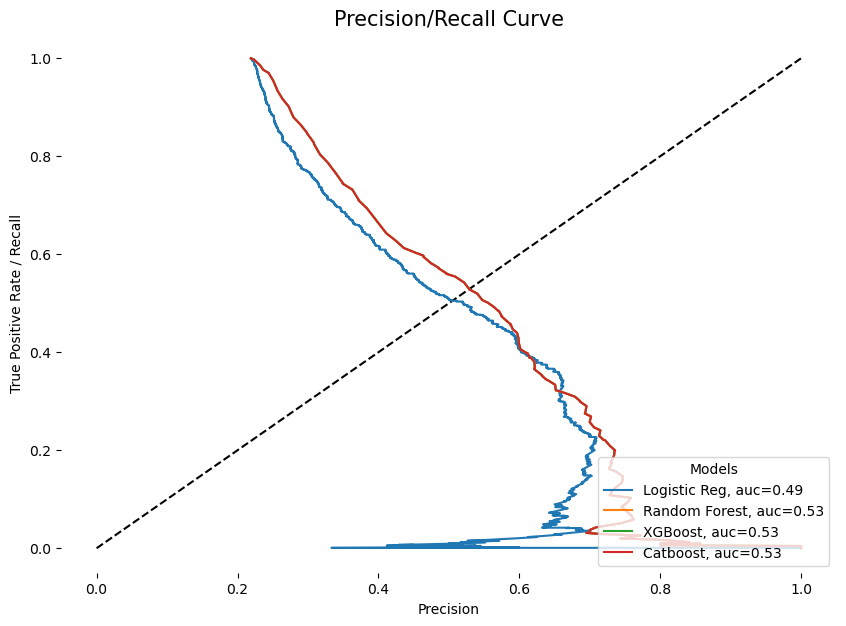

In [186]:
y_pred_proba_lr = lr.predict_proba(X_test_trans)[::,1]
precision1, recall1,thresh1 = precision_recall_curve(y_test, y_pred_proba_lr)
auc1 = auc(recall1,precision1)

y_pred_proba_RF = rf.predict_proba(X_test_trans)[::,1]
precision2, recall2,thresh2 = precision_recall_curve(y_test, y_pred_proba_RF)
auc2 = auc(recall2,precision2)

y_pred_proba_XGB = rf.predict_proba(X_test_trans)[::,1]
precision3, recall3,thresh3 = precision_recall_curve(y_test, y_pred_proba_XGB)
auc3 = auc(recall3,precision3)

y_pred_proba_CBT = rf.predict_proba(X_test_trans)[::,1]
precision4, recall4,thresh4 = precision_recall_curve(y_test, y_pred_proba_CBT)
auc4= auc(recall4,precision4)


plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(precision1,recall1,label="Logistic Reg, auc="+str(round(auc1,2)))
plt.plot(precision2, recall2,label="Random Forest, auc="+str(round(auc2,2)))
plt.plot(precision3, recall3,label="XGBoost, auc="+str(round(auc3,2)))
plt.plot(precision4, recall4,label="Catboost, auc="+str(round(auc4,2)))
plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('Precision')
plt.ylabel('True Positive Rate / Recall')
plt.title('Precision/Recall Curve', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True)

## Result and Discussions
1. The target dataset is completely imbalanced which again proves the call for precision/recall.
2. There are number of client who are/may default next month are not considered. 
3. After cosidering f-1 score in grid search cv, we have increased value of FP and FN and also decreased TN.
4. Decrease in TN shows that number of minority class has been predicted correctly into FP or FP.

##          ********END********

# THANK YOU